# Final Project 

## Name: Rena Wu 

## Introduction:  
Depression is a widespread mental health disorder, with approximately 9.5% of adults in the U.S. experiencing it annually. Research indicates that depression is influenced by many different factors, including stressful events, personality traits, family history, pregnancy, menopause, loneliness, substance use, and physical illness. Given the wide-ranging effects of depression on behavior and quality of life, it is important to identify the factors contributing to its onset and severity. This understanding can help inform strategies to alleviate its impact and improve mental well health. 

## Dataset description and why interesting:  

The data I chose is called "Depression Professional Dataset", it is statistical research helping to detect someone's depression status. This dataset explores the relationship between mental health and demographic, lifestyle, and work-related factors. This dataset contains 2054 entries in total with 11 columns and as show in the blow: 

1. Gender: Male/Female: no missing data [Categorical]
2. Age (in years): no missing data  [Numerical]
3. Work pressure (1:low to 5:high): no missing data  [Numerical]
4. Job Satisfaction (1:low to 5:high): no missing data [Numerical]
5. Sleep Duration (< 5 hours, 5-6 hours, 7-8 hours, more than 8 hours): no missing data [Categorical] 
6. Dietary Habits (health, moderate, unhealthy): no missing data  [Categorical]
7. Have you ever had suicidal thoughts (yes/no): no missing data  [Categorical]
8. Work hours (per days): no missing data  [Numerical]
9. Financial Stress (1:low to 5: high): no missing data [Numerical]
10. Family history of Mental Illness (yes/no): no missing data [Categorical]
11. Depression (yes/no): no missing data [Categorical]

This dataset is particularly interesting because it focuses on both immutable factors (e.g., age, gender) and modifiable ones (e.g., sleep duration, dietary habits). This dual focus allows for analysis of how lifestyle changes might reduce the prevalence of depression, making it a valuable resource for designing interventions to enhance quality of life. Also, 11 columns allow us to perform many different analyses and get interesting results.  


## Acquire dataset: 
The dataset was obtained from Kaggle at the following URL: Depression https://www.kaggle.com/datasets/ikynahidwin/depression-professional-dataset. It is available under the CC0 license, which allows unrestricted use, modification, and distribution. To download, I navigated to the dataset page and clicked the "Download" button, saving the file in CSV format for analysis. 

## Fairness:  

In order for the data to be fair, it needs to be findable, accessible, interoperable and reusable for computer.  

Findable: The dataset is easily accessible on Kaggle with a well-documented description, ensuring users can locate it effortlessly. 

Accessible: The CC0 license ensures that the dataset is openly available without restrictions. And anyone has access to this dataset. 

Interoperable: The data is in a standard CSV format and includes clear, well-defined column names, making it compatible with different analysis tools and platforms. This dataset does not contain any missing value, and it is well organized.  

Reusable: Comprehensive documentation on Kaggle provides sufficient context for understanding and reusing the data, ensuring it can support further research. This data can always be use by accessing the website,  

Therefore, this dataset maintains the well fairness, one potential improvement to improve FAIRness would be the inclusion of metadata in a machine readable format, such as JSON-LD, to better support integration with other datasets. Overall, I believe this dataset maintails well FAIRness.  

##### *Example of 2 question that I could explore based on this dataset:*
1. Does female has a higher chance to get depression compare to male? 
2. What are the important factors that cause people get depression? 

## Data cleaning / preprocessing
The dataset is complete with no missing values, as confirmed through exploratory analysis. The following steps were performed to ensure its readiness for analysis: 

1. Data formating: Replace Yes/No answer with 1/0 for eaiser analysis, convert all value into lower case. 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import skew
# read data 
df = pd.read_csv("dataset/Depression_Professional_Dataset.csv")

df['Gender'] = df['Gender'].str.lower()
df['Dietary Habits'] = df['Dietary Habits'].str.lower()
df['Sleep Duration'] = df['Sleep Duration'].str.lower()
df.replace({'Yes': 1, 'No': 0}, inplace=True)
print(df.head())

   Gender  Age  Work Pressure  Job Satisfaction Sleep Duration Dietary Habits  \
0  female   37            2.0               4.0      7-8 hours       moderate   
1    male   60            4.0               3.0      5-6 hours      unhealthy   
2  female   42            2.0               3.0      5-6 hours       moderate   
3  female   44            3.0               5.0      7-8 hours        healthy   
4    male   48            4.0               3.0      7-8 hours       moderate   

   Have you ever had suicidal thoughts ?  Work Hours  Financial Stress  \
0                                      0           6                 2   
1                                      1           0                 4   
2                                      0           0                 2   
3                                      1           1                 2   
4                                      1           6                 5   

   Family History of Mental Illness  Depression  
0                 

C:\Users\ruiwu\AppData\Local\Temp\ipykernel_26888\3873131077.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No': 0}, inplace=True)


Now, our data contains only response in lower case and there is no Yes/No answer. Just 0/1, which helps us for the futher analysis step. 

2. Duplicate Removal: Duplicate rows were dropped to prevent redundancy 

In [3]:
df.drop_duplicates(inplace=True)

3. Confirm there is no missing value, if there is missing value, we need to handle them. 

In [4]:
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
Gender                                   0
Age                                      0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work Hours                               0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


There is no missing value from the dataset

4. Categorical Encoding:  Non-numeric columns were converted into numeric values for compatibility with statistical and machine learning models: 

Yes/No columns (e.g., Suicidal Thoughts, Family History, Depression): Encoded as 1/0. 

Gender: Male = 0, Female = 1. 

Dietary Habits: Unhealthy = 0, Moderate = 1, Healthy = 2. 

Sleep Duration: <5 hours = 0, 5-6 hours = 1, 7-8 hours = 2, >8 hours = 3. 

In [5]:
sleep_duration_mapping = {
    'less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'more than 8 hours': 3
}

dietary_habits_mapping = {
    'unhealthy': 0,
    'moderate': 1,
    'healthy': 2
}

gender_mapping = {
    'male': 0,
    'female': 1
}
df['Sleep Duration'] = df['Sleep Duration'].replace(sleep_duration_mapping)
df['Dietary Habits'] = df['Dietary Habits'].replace(dietary_habits_mapping)
df['Gender'] = df['Gender'].replace(gender_mapping)
print(df.head())


   Gender  Age  Work Pressure  Job Satisfaction  Sleep Duration  \
0       1   37            2.0               4.0               2   
1       0   60            4.0               3.0               1   
2       1   42            2.0               3.0               1   
3       1   44            3.0               5.0               2   
4       0   48            4.0               3.0               2   

   Dietary Habits  Have you ever had suicidal thoughts ?  Work Hours  \
0               1                                      0           6   
1               0                                      1           0   
2               1                                      0           0   
3               2                                      1           1   
4               1                                      1           6   

   Financial Stress  Family History of Mental Illness  Depression  
0                 2                                 0           0  
1                 4         

C:\Users\ruiwu\AppData\Local\Temp\ipykernel_26888\1045703711.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sleep Duration'] = df['Sleep Duration'].replace(sleep_duration_mapping)
C:\Users\ruiwu\AppData\Local\Temp\ipykernel_26888\1045703711.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dietary Habits'] = df['Dietary Habits'].replace(dietary_habits_mapping)
C:\Users\ruiwu\AppData\Local\Temp\ipykernel_26888\1045703711.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a 

Noticed this dataset only allow certain answer, there is no outliers can be found from this dataset. We could test for outliers via boxplot just to be safe. 

5. Spread of the datapoint and outlier detection (columns that contains answer more than just 1/0): I didn’t apply boxplots for all the columns as some of them only contain number 1 or 0 (yes, no) and age is too spread and will not works well for boxplot. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def getBoxplot(columns):
    data = [df[column] for column in columns]
    
    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=columns)
    plt.title('Boxplots of Some of the factors')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"Number of outliers in {column}: {len(outliers)}")
        if len(outliers) > 0:
            print(f"Outliers in {column}:\n{outliers}\n")

C:\Users\ruiwu\AppData\Local\Temp\ipykernel_26888\1400447560.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=columns)


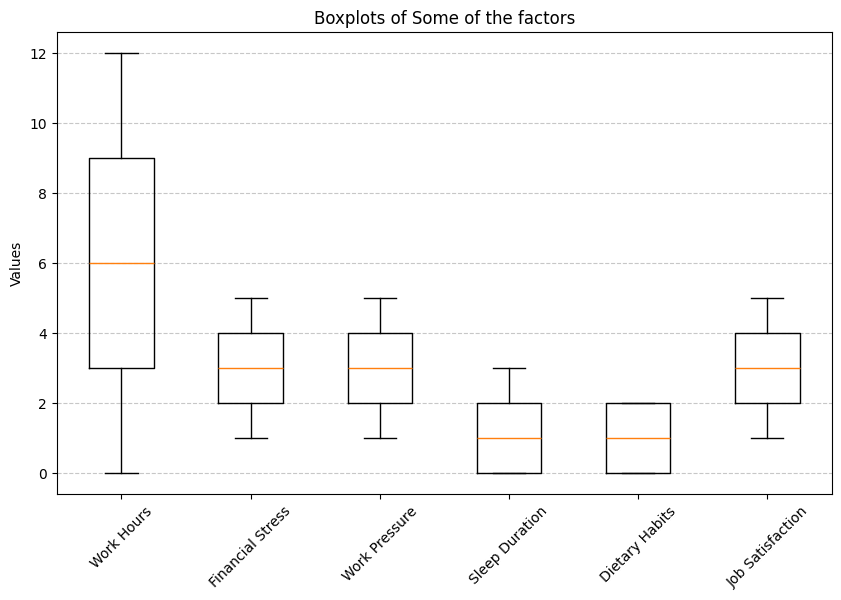

Number of outliers in Work Hours: 0
Number of outliers in Financial Stress: 0
Number of outliers in Work Pressure: 0
Number of outliers in Sleep Duration: 0
Number of outliers in Dietary Habits: 0
Number of outliers in Job Satisfaction: 0


In [7]:
# get boxplot of working hour, job satisfaction
getBoxplot(["Work Hours", "Financial Stress", "Work Pressure", "Sleep Duration", "Dietary Habits", "Job Satisfaction"])


From above boxplot, we get to see that there is no outliers appears and most of the factors are well distributed. Notes that most of the people gain more than 5 hours of sleep. And interesting thing is that the dietary habits is the most well distributed. It is distributed very evenly and fall under normal distribution. 

6. Checking for misleading data (columns that wasn't apply boxplot): use barplot to see if there is any columns that may be misleading to our entire dataset. 

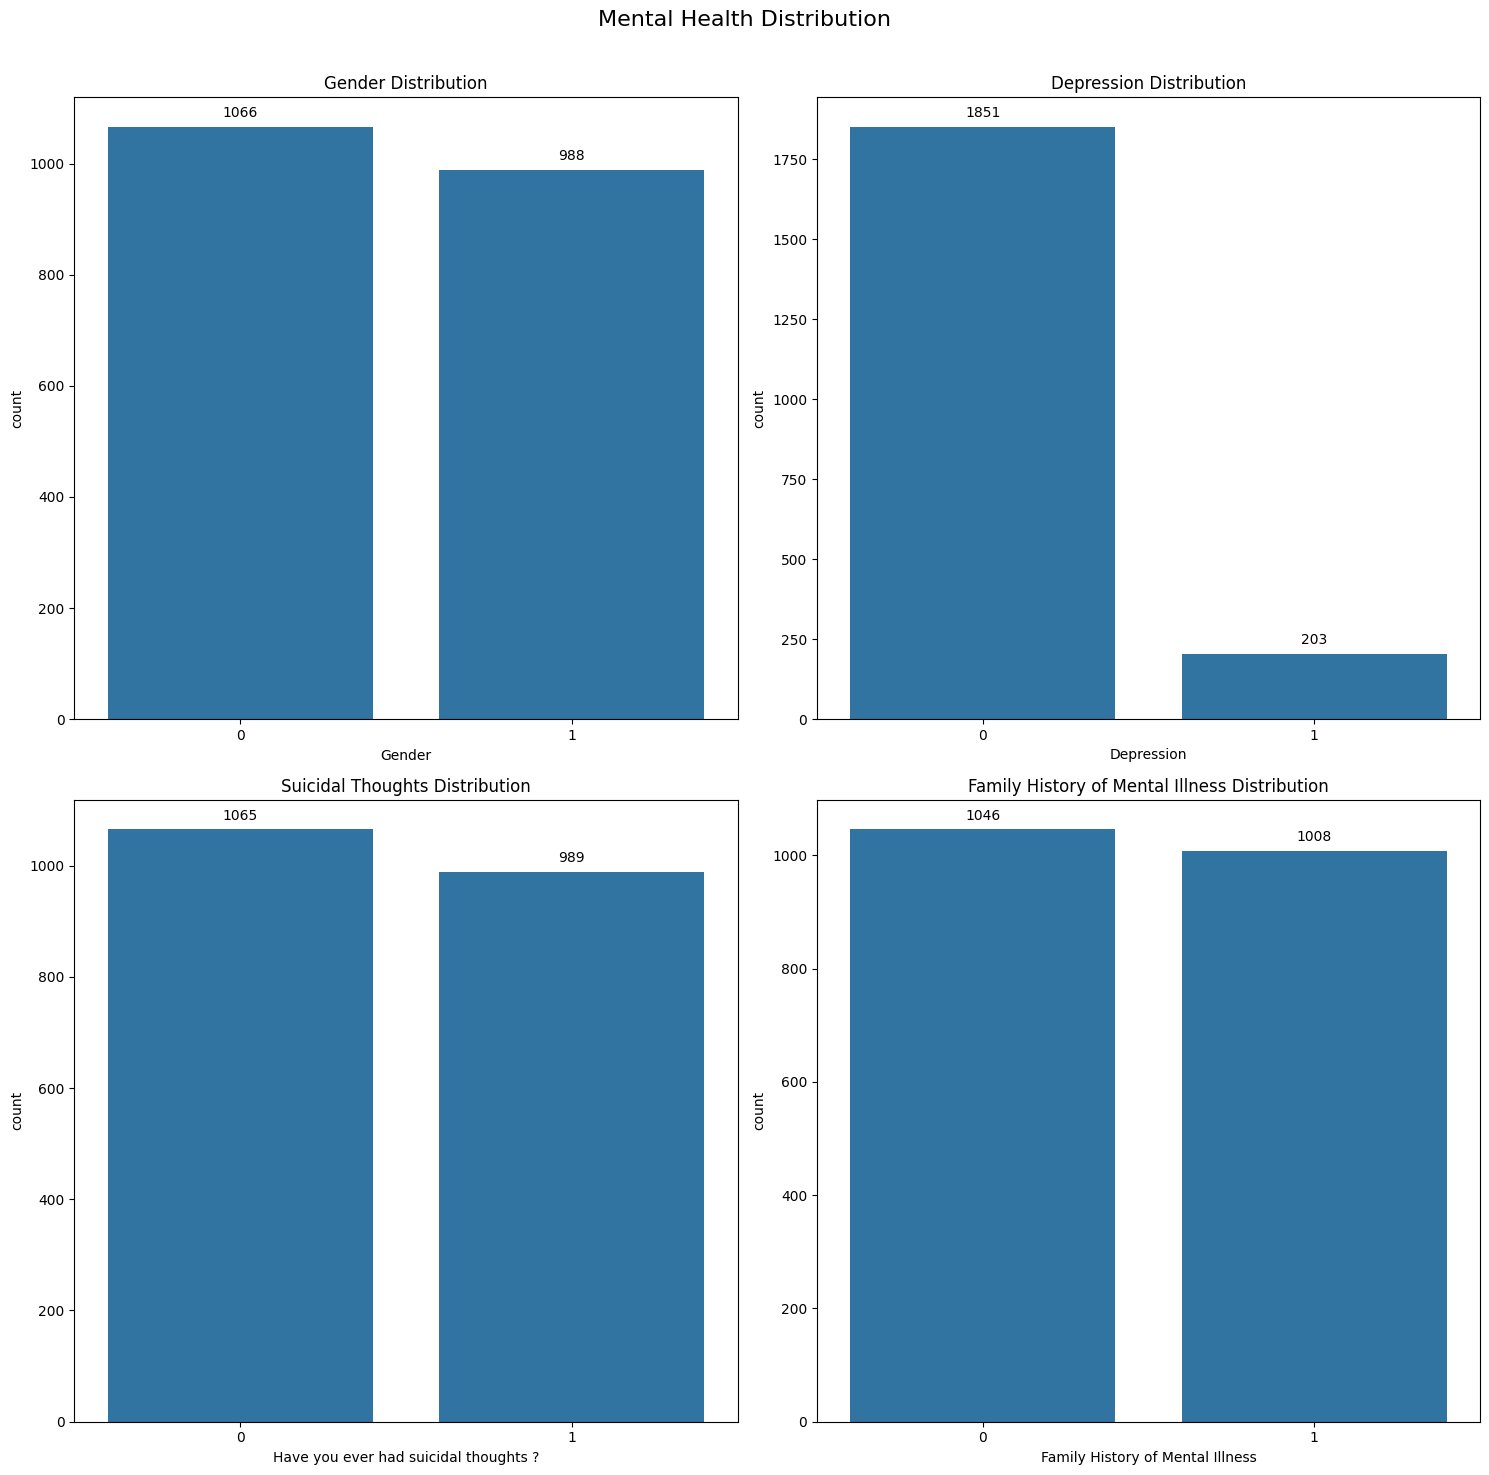

In [8]:
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', 
            xytext = (0, 10), 
            textcoords = 'offset points'
        )
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Mental Health Distribution', fontsize=16)

# Plot Gender distribution
ax_gender = sns.countplot(ax=axes[0, 0], x='Gender', data=df)
axes[0, 0].set_title('Gender Distribution')
add_labels(ax_gender)


# Plot Suicidal Thoughts distribution
ax_suicidal = sns.countplot(ax=axes[1, 0], x='Have you ever had suicidal thoughts ?', data=df)
axes[1, 0].set_title('Suicidal Thoughts Distribution')
add_labels(ax_suicidal)

# Plot Family History of Mental Illness distribution
ax_family_history = sns.countplot(ax=axes[1, 1], x='Family History of Mental Illness', data=df)
axes[1, 1].set_title('Family History of Mental Illness Distribution')
add_labels(ax_family_history)

# Plot Depression distribution
ax_depression = sns.countplot(ax=axes[0, 1], x='Depression', data=df)
axes[0, 1].set_title('Depression Distribution')
add_labels(ax_depression)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


From above bar graph and label numbers from each bar, we get to see that this dataset contain well balance data. It contains similar number in gender, number of people has sucidal thought, and family hisotry of mental illness. The only concern from this dataset is that only 203 people has depression. This does not give us enough sample of people with depression. This could mislead our prediction model. 

It is also interesting to see that the number of people had sucidal thought is similar to the number of people has family hisotry of mental illness. 

Now, find if there is any misleading data in terms of ages by piechart. 

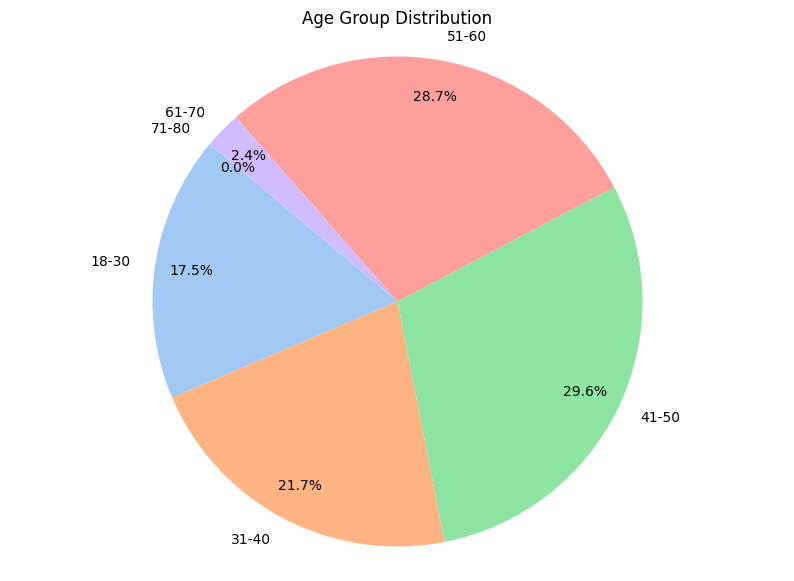

In [9]:
bins = [18, 30, 40, 50, 60, 70, 80]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Categorize ages into bins
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the counts for each age group
age_group_counts = df['Age Group'].value_counts().sort_index()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("pastel"), labeldistance=1.1, pctdistance=0.85)

plt.title('Age Group Distribution')
plt.axis('equal')  
plt.show()

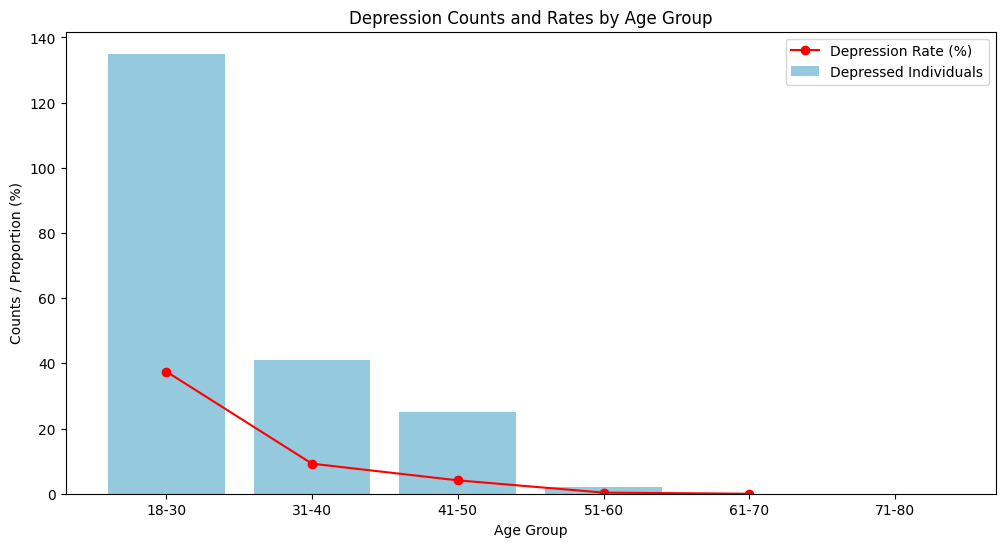

In [10]:
depressed_df = df[df['Depression'] == True]
depressed_age_group_counts = depressed_df['Age Group'].value_counts().sort_index()


age_group_totals = df['Age Group'].value_counts().sort_index()
depression_proportions = (depressed_age_group_counts / age_group_totals) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=depressed_age_group_counts.index, y=depressed_age_group_counts.values, color='skyblue', label='Depressed Individuals')
plt.plot(depression_proportions.index, depression_proportions.values, color='red', marker='o', label='Depression Rate (%)')
plt.title('Depression Counts and Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Counts / Proportion (%)')
plt.legend()
plt.show()


From above piechart, we get to see that this dataset does not included people with age lower than 18 years old and people with age older than 70 years old. Most people in this dataset are in the age range of 41-50 years old and there is no much sample in the age group 18 - 30 years old. Even thought it is not very balance, but it cover must of the age group and it is relative well distributed. 

An interested observation from above is that even though people at age group 18-30 are only 17.5% of the entire population, but this group has the most number of depression. This may due to many different factors, for example, people at this age group are in the most unable stage of their life and they are more likely to said honestly that they have depression compare to other poplution from other age group. 

7. Dimensionality Reduction: Principal Component Analysis (PCA) was used to visualize the dataset. Data points falling beyond 3 standard deviations in PCA space were flagged as outliers, and only one outlier (index 1207) was removed.

Each datapoint will be classify into 2 category based on the status of depression or not and they will be represented by different color of data point. 

In [11]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler    
import plotly.express as px

# Read the dataset
df = pd.read_csv("clean.csv")
features = df.drop(columns=['Depression'])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Depression'] = df['Depression'].map({1: 'Depression', 0: 'No Depression'}) 

# Create scatter plot with Plotly using blue/yellow colors
fig = px.scatter(pca_df, x='Principal Component 1', y='Principal Component 2', 
                 color='Depression', title='PCA of Mental Health Dataset',
                 color_discrete_map={'Depression': 'red', 'No Depression': 'blue'})

# Show plot
fig.show()

From the PCA result show above, we get to see that all the data point are dense and group together. There is no obvious outlier and people with depression and no depression seems to overlap a lot. 

As it is hard to identify outlier using eye, we could do that via code that every point that are more than 3 standard deviations from the mean in the PCA space as outliers. 

In [12]:
import numpy as np
z_scores = np.abs((principal_components - principal_components.mean(axis=0)) / principal_components.std(axis=0))
outliers = np.where(z_scores > 3)

# Mark outliers in the plot
pca_df['Outlier'] = ['Outlier' if i in outliers[0] else 'Normal' for i in range(pca_df.shape[0])]

# Create scatter plot highlighting outliers
fig_with_outliers = px.scatter(pca_df, x='Principal Component 1', y='Principal Component 2', 
                 color='Outlier', title='PCA of Mental Health Dataset',
                 color_discrete_map={'Outlier': 'red', 'Normal': 'blue'})
fig_with_outliers.show()

In [13]:
# Get the indices of the outliers
outlier_indices = outliers[0]

# Extract the outlier rows from the original dataframe
outlier_info = df.iloc[outlier_indices]

relevant_outlier_info = outlier_info[["Age", "Work Pressure", "Job Satisfaction", "Sleep Duration", "Dietary Habits", 
                            "Have you ever had suicidal thoughts ?", "Work Hours", "Financial Stress", "Family History of Mental Illness", "Depression"]]

# Output the outlier information
print("Outlier Information:")
print(relevant_outlier_info)




Outlier Information:
      Age  Work Pressure  Job Satisfaction  Sleep Duration  Dietary Habits  \
394    24            1.0               3.0               0               2   
502    24            1.0               5.0               0               2   
1207   18            1.0               4.0               0               2   

      Have you ever had suicidal thoughts ?  Work Hours  Financial Stress  \
394                                       0           9                 1   
502                                       1          10                 1   
1207                                      0           0                 1   

      Family History of Mental Illness  Depression  
394                                  1           0  
502                                  1           0  
1207                                 1           0  


This is the outlier information, but it is hard to understand using number only. So, we will convert some of the numerical value back to categorical. 

In [14]:
mappings_back = {
        "Sleep Duration": {
            0: 'less than 5 hours',
            1: '5-6 hours',
            2: '7-8 hours',
            3: 'more than 8 hours'
        },
        "Dietary Habits": {
            0: 'unhealthy',
            1: 'moderate',
            2: 'healthy'
        },
        "Gender": {
            0: 'male',
            1: 'female'
        },
        "Have you ever had suicidal thoughts ?": {
            0: 'No',
            1: 'Yes'
        },
        "Family History of Mental Illness" : {
            0: 'No',
            1: 'Yes'
        },
        "Depression": {
            0: 'No',
            1: 'Yes'
        }
    }

converted_outlier_info = relevant_outlier_info.copy()

# Replace values based on the mappings
for column, mapping in mappings_back.items():
    if column in converted_outlier_info.columns:
        converted_outlier_info[column] = converted_outlier_info[column].replace(mapping)

# Display the converted outlier information
print("Converted Outlier Information:")
print(converted_outlier_info)

# Save to a file if needed
converted_outlier_info.to_csv("converted_outlier_info.csv", index=False)

Converted Outlier Information:
      Age  Work Pressure  Job Satisfaction     Sleep Duration Dietary Habits  \
394    24            1.0               3.0  less than 5 hours        healthy   
502    24            1.0               5.0  less than 5 hours        healthy   
1207   18            1.0               4.0  less than 5 hours        healthy   

     Have you ever had suicidal thoughts ?  Work Hours  Financial Stress  \
394                                     No           9                 1   
502                                    Yes          10                 1   
1207                                    No           0                 1   

     Family History of Mental Illness Depression  
394                               Yes         No  
502                               Yes         No  
1207                              Yes         No  


Even thought there are 3 outlier that are more than 3 standard deviations from the mean in the PCA space, but they are within 4 standard deviation. Also, there are only 3 of those datapoint, so this dataset will not be skewed by outlier. 

After reviewing all 3 outlier information, I think their data make senses to me except for the last one with row number 1207. As it has 0 work hours and 4.0 Job satisfaction, this data does not make sense. But this could be due to this person doesn't have a job but for job satisfaction column there are only value 1 to 5 that can be choose. Therefore, I will remove the person with row number 1207 and keep the other 2 datapoint. This is because the the dataset will not skewed by them and they are within 4 standard deviation distance. 

In [15]:
# Remove the row of 1207:
# print(df.loc[[394, 502, 1207]])
df_cleaned = df.drop(index=1207)
df_cleaned.to_csv('cleans.csv', index=False) 

## Data format
8. Save the processed data: We save the processed data file into cleans.csv file and this file will be used for analysis in the next part as well as the website design. 

# Analyses


## Summary statistics 
Overall, from the data cleaning and preprocessing, we get to see that this is a very good dataset, most of the data are not misleading and most of them are well distributed. One of the concern is that out of 2054 - 1 (index 1024 get removes) = 2053 people, there are only 203 people with depression in this dataset. This could make our prediction model tend to predict people are not depressed based on that. Another one is that even though people from age group 18-30 is only the 17.5% of the entire poplution in this dataset, it gives the highest number of people with depression. This may suggest that age is an important factors for this dataset. 

Even thuogh we plot the boxplot before, it would be nice to see the detail information of each columns including min, max, std. 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('cleans.csv')

def summary_statistics(df):
    print("Summary Statistics:")
    print(df.describe(include='all'))
    print("\nMissing Values:")
    print(df.isnull().sum())
# Call the summary statistics function
summary_statistics(df)


Summary Statistics:
            Gender          Age  Work Pressure  Job Satisfaction  \
count  2053.000000  2053.000000    2053.000000       2053.000000   
mean      0.481247    42.183634       3.022893          3.014613   
std       0.499770    11.451563       1.416955          1.418611   
min       0.000000    18.000000       1.000000          1.000000   
25%       0.000000    35.000000       2.000000          2.000000   
50%       0.000000    43.000000       3.000000          3.000000   
75%       1.000000    52.000000       4.000000          4.000000   
max       1.000000    60.000000       5.000000          5.000000   

       Sleep Duration  Dietary Habits  Have you ever had suicidal thoughts ?  \
count     2053.000000     2053.000000                            2053.000000   
mean         1.484170        0.983926                               0.481734   
std          1.114484        0.823767                               0.499788   
min          0.000000        0.000000          

There is no much valuable information from above summary statistics all we get to visulized it using boxplot in the data preprocessing part. 

## Heatmap: More then just Summary statistics 
To get a better idea of correlation between differnt factor, we can apply correlation analysis and heatmaps.

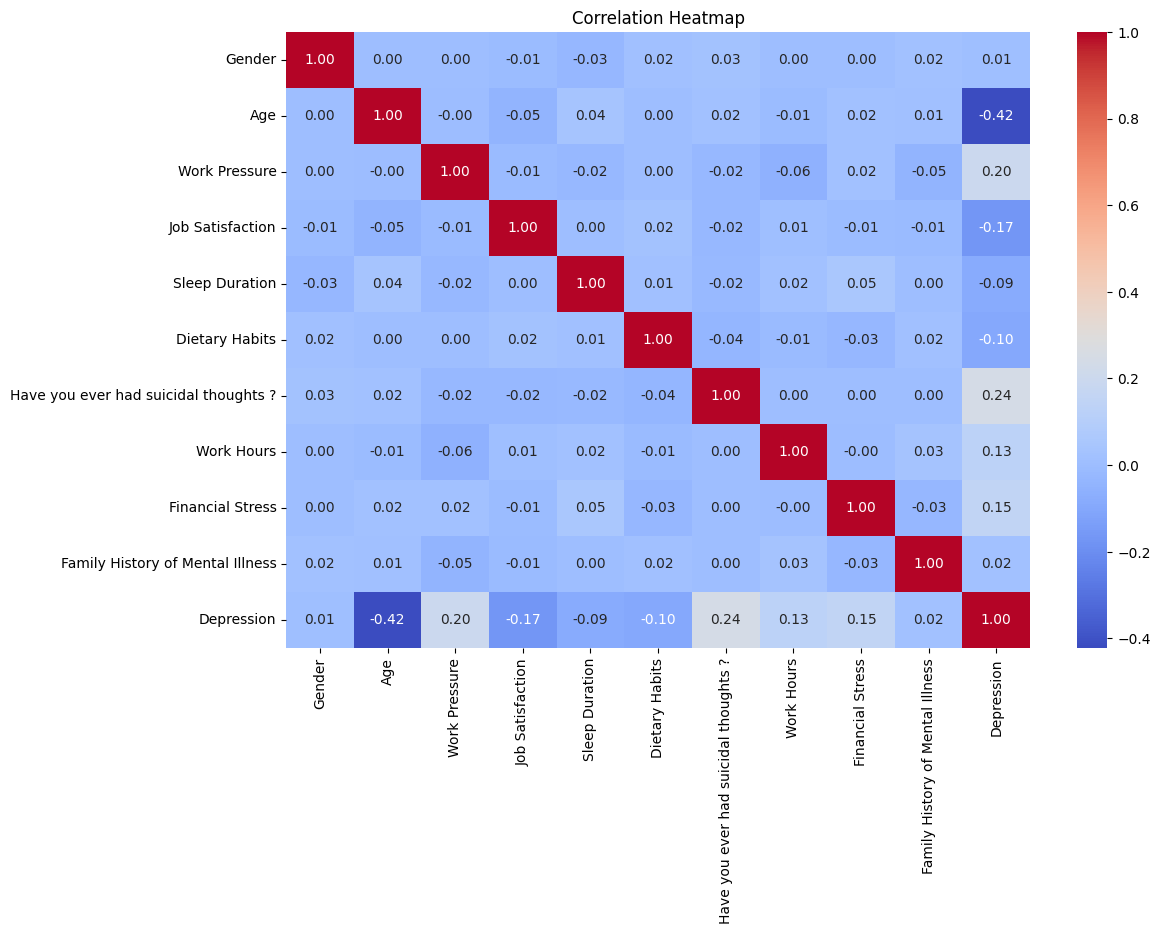

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

target_variable = 'Depression'
data = pd.read_csv("cleans.csv")
# Encode Depression as numerical if it's categorical
if data[target_variable].dtype == 'object':
    data[target_variable] = data[target_variable].map({'Depression': 1, 'No Depression': 0})

# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()



From the heatmap, we observe correlations between different factors. In this section, we focus on correlations **excluding** depression to uncover patterns among other variables.

#### Key Observations:
Lack of Positive Correlations: Interestingly, **excluding** depression, no positive correlations exist between any two factors—all correlations are negative.

Work Hours and Work Pressure:
A surprising observation is the weak negative correlation (-0.06) between work hours and work pressure. This suggests that longer working hours do not necessarily equate to higher work pressure.

Family History of Mental Illness and Work Pressure:
Family history of mental illness shows a slight negative correlation (-0.05) with work pressure. This might indicate that individuals with such a history are more likely to choose low-pressure jobs or prioritize mental health.

Suicidal Thoughts and Dietary Habits:
Suicidal thoughts negatively correlate with dietary habits (-0.04), implying that individuals with suicidal thoughts may have unhealthy eating patterns, possibly due to a lack of focus on their well-being.

Financial Stress and Dietary Habits:
Financial stress is negatively correlated (-0.03) with dietary habits, suggesting that individuals under financial stress may neglect their nutrition.

Other Correlations:
All remaining correlations are very weak (less than 0.03) and therefore not highlighted here. However, readers are encouraged to explore the heatmap for any insights.

Implications:
The absence of strong correlations among most factors is promising, as it minimizes dependency issues in subsequent analyses. Even the weak correlations observed are unlikely to significantly affect the analysis results.

Next Steps:
We will now examine the correlations between each factor and depression to uncover specific relationships.

In [18]:
# Filter correlations related to the depression
target_correlations = correlation_matrix[target_variable].sort_values(ascending=True)

print("Features most correlated with Depression:")
print(target_correlations)


Features most correlated with Depression:
Age                                     -0.422072
Job Satisfaction                        -0.166792
Dietary Habits                          -0.096566
Sleep Duration                          -0.088291
Gender                                   0.007534
Family History of Mental Illness         0.017718
Work Hours                               0.128257
Financial Stress                         0.151495
Work Pressure                            0.197382
Have you ever had suicidal thoughts ?    0.239081
Depression                               1.000000
Name: Depression, dtype: float64


C:\Users\ruiwu\AppData\Local\Temp\ipykernel_26888\2250021757.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




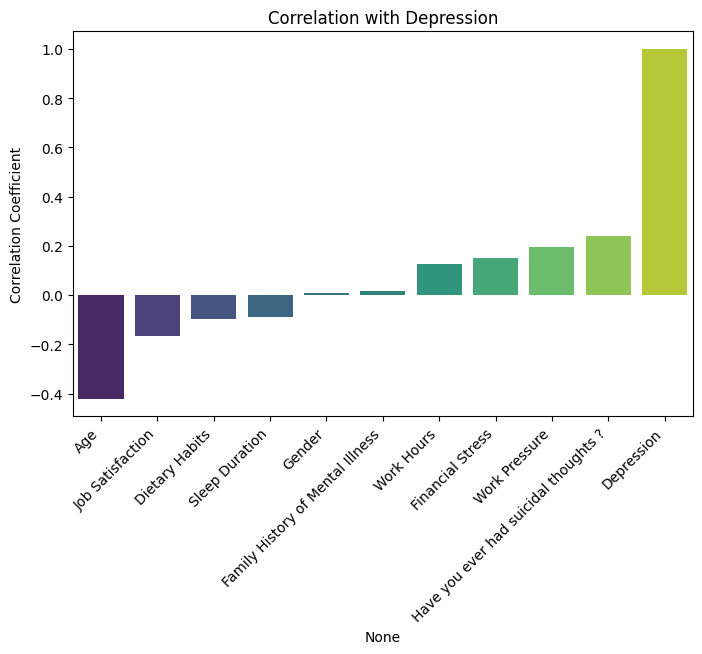

In [19]:

# Highlight correlations with Depression
plt.figure(figsize=(8, 5))
sns.barplot(x=target_correlations.index, y=target_correlations.values, palette='viridis')
plt.title('Correlation with Depression')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlation Coefficient')
plt.show()

From the above bar chart and output information, we can observe the correlations between various factors and depression, arranged in ascending order. Below are the key findings:

Age and Depression:
Age shows a significantly negative correlation with depression, indicating that older individuals are less likely to experience depression. This aligns with the insights from the earlier pie chart.

Protective Factors related to Depression:

Job Satisfaction: Higher job satisfaction correlates with a lower likelihood of depression.
Dietary Habits: Better dietary habits are associated with a reduced risk of depression.
Sleep Duration: Longer sleep duration appears to lower the risk of depression.
These results are consistent with expectations and underline the importance of maintaining a healthy lifestyle.
Gender Differences:
Females exhibit a slightly higher likelihood of experiencing depression compared to males. This observation is consistent with findings from other studies, although the difference is not statistically significant.

Risk Factors related to Depression:

Financial Stress: Higher financial stress is strongly associated with a greater risk of depression.
Work Pressure: Increased work pressure also correlates with higher depression rates.
Suicidal Thoughts: Suicidal thoughts have one of the strongest correlations with depression, emphasizing the importance of addressing mental health concerns promptly.

Insights from Summary Statistics and Correlation Map:
The analysis did not reveal any surprising factors as most findings align with common sense and existing literature. Notably, work pressure appears to have aslightly stronger correlation with depression compared to financial stress.


## Main question I would like to answer with the analysis and reasoning: 
1. Does gender affect the likelihood of experiencing depression?

Existing research suggests that females are twice as likely to develop depression compared to males. This analysis will determine whether the dataset aligns with this established finding.

2. What are the important factors contributing to depression, especially those that can be controlled?

This analysis focuses on modifiable lifestyle factors, such as work hours, dietary habits, and sleep duration. By identifying these factors, actionable recommendations can be made to improve mental health.

In order to answer the first question, we could started from visulized the number of people with depression under each gender: 

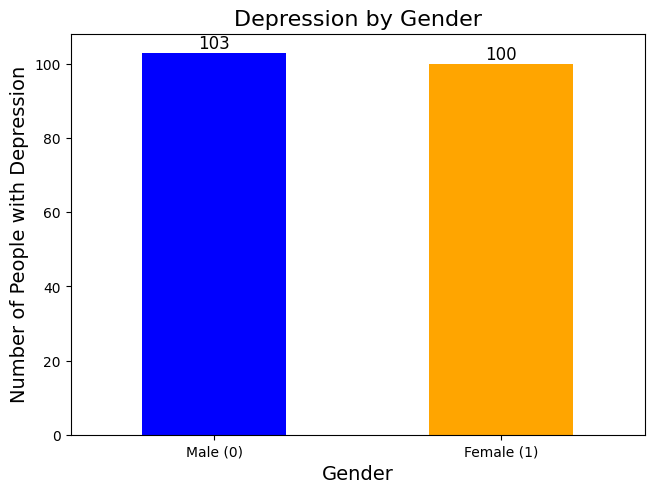

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for gender vs. depression count
gender_depression_counts = df.groupby('Gender')['Depression'].sum()

# Create the bar plot
gender_depression_counts.plot(kind='bar', color=['blue', 'orange'])

# Add labels to the bars
for index, value in enumerate(gender_depression_counts):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

# Set labels and title
plt.xlabel('Gender', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Male (0)', 'Female (1)'], rotation=0)
plt.tight_layout()
plt.ylabel('Number of People with Depression', fontsize=14)
plt.title('Depression by Gender', fontsize=16)

# Show the plot
plt.show()



From above, we get to see that in this dataset, male has a higher number of people with depression. But there are more male compare to female in this dataset, we can see the depression rate by the following code: 

C:\Users\ruiwu\AppData\Local\Temp\ipykernel_26888\2319008204.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




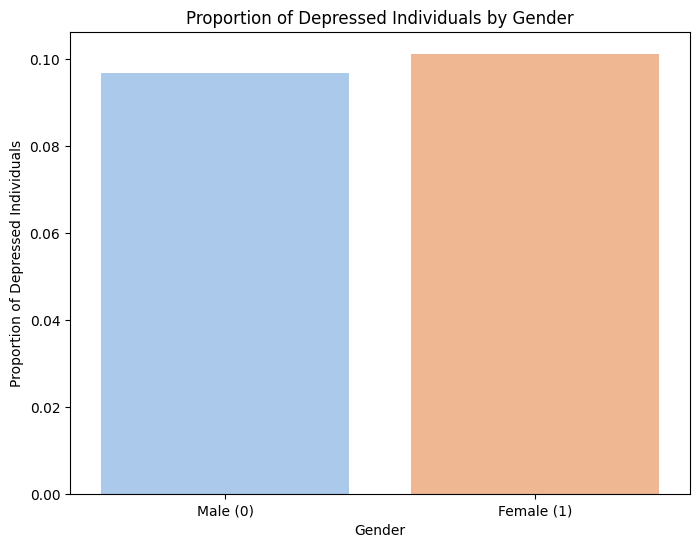

In [21]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is the DataFrame containing 'Gender' and 'Depression' columns
# Gender: 0 = Female, 1 = Male (or other appropriate encoding)
# Depression: 0 = Not Depressed, 1 = Depressed

# Group by Gender and calculate the depression rate for each group
gender_depression_rate = df.groupby('Gender')['Depression'].value_counts(normalize=True).unstack(fill_value=0)

# Plot the distribution of depression by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_depression_rate.index, y=gender_depression_rate[1], palette="pastel")
plt.xlabel('Gender')
plt.xticks(ticks=[0, 1], labels=['Male (0)', 'Female (1)'], rotation=0)
plt.ylabel('Proportion of Depressed Individuals')
plt.title('Proportion of Depressed Individuals by Gender')
plt.show()

Even thought there are more male with depression, we can see that female has a higher rate of depression compare to male. But the difference is small, so we will apply chi-square test to check if there is a difference in depression rates in terms of gender. 

## Chi-square Test

Null hypothesis: There is no difference between male / female 

Alternative hypothesis: There is a difference in depression rate between gender

We set threshold as 0.05 and run the chi-square test below. 


In [22]:

# Perform Chi-Square test to check for significant association between Gender and Depression
contingency_table = pd.crosstab(df['Gender'], df['Depression'])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2}')
print(f'P-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant difference in depression rates between genders.")
else:
    print("There is no statistically significant difference in depression rates between genders.")


Chi-Square Statistic: 0.07149001390308482
P-value: 0.7891795487592119
There is no statistically significant difference in depression rates between genders.


We observed no statistically significant difference in depression rates between genders, with the differences being small. This result is unexpected and **surprise** to me as it differs from many existing studies that suggest females are about twice as likely as males to experience depression.

Some factors could explain this result:

Reporting Bias:
Females may underreport depression symptoms due to societal stigma or pressure, leading to potential underrepresentation of true depression rates in the dataset.

Sample Size and Composition:
The dataset consists of 1,066 - 1 (one was removed from the preprocessing step) males and 988 females, which may not provide sufficient statistical power to detect subtle differences. Moreover, the sample might not be representative of the general population.


## Validation: Logistic Regression Model
In order to validate my result and answering for the question #2, build a Logistic Regression model. 

Randomly chooose 70% of the data as the traning dataset and use standardScaler to make sure each factor contributed equally in the dataset. After that, use the traing data fit to the logistic regression model. 

Predicted the result (depression / no depression) given test data of X. 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df[['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration', 
        'Dietary Habits', 'Have you ever had suicidal thoughts ?', 
        'Work Hours', 'Financial Stress', 'Family History of Mental Illness']]
y = df['Depression']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
#print(X.head(), y.head())
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get predictions on the test data
y_pred = model.predict(X_test)

print("Number of people with depression in the training dataset：" +str(sum(y_train==1)))
print("Number of people without depression in the training dataset：" +str(sum(y_train==0)))

Number of people with depression in the training dataset：148
Number of people without depression in the training dataset：1289


In [24]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.987012987012987

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       561
           1       1.00      0.85      0.92        55

    accuracy                           0.99       616
   macro avg       0.99      0.93      0.96       616
weighted avg       0.99      0.99      0.99       616


Confusion Matrix:
 [[561   0]
 [  8  47]]


This model give us a high accuracy of 0.987, which indicated our model performance is very good. From the confusion matrix and the classification report, we get to see that there are much more people with depression (561) compare to the people without (47+8). And this model perform better when predicting the people without depression with 0.99 precision, 1 recall, 0.99 f1 score while there is1 precision, 0.85 recall, 0.92 f1-score when predicting people wihout depression. It is clear that it has a higher false positive rate and higher false negative rate when predicting people with depression. 

This could be due to many reasons:
1. Our training dataset is not big enough (1289 + 148 entries) 
2. There are only 148 people with depression (compare to 1289 people without depression)

Let's see the important factor that result from this model. 

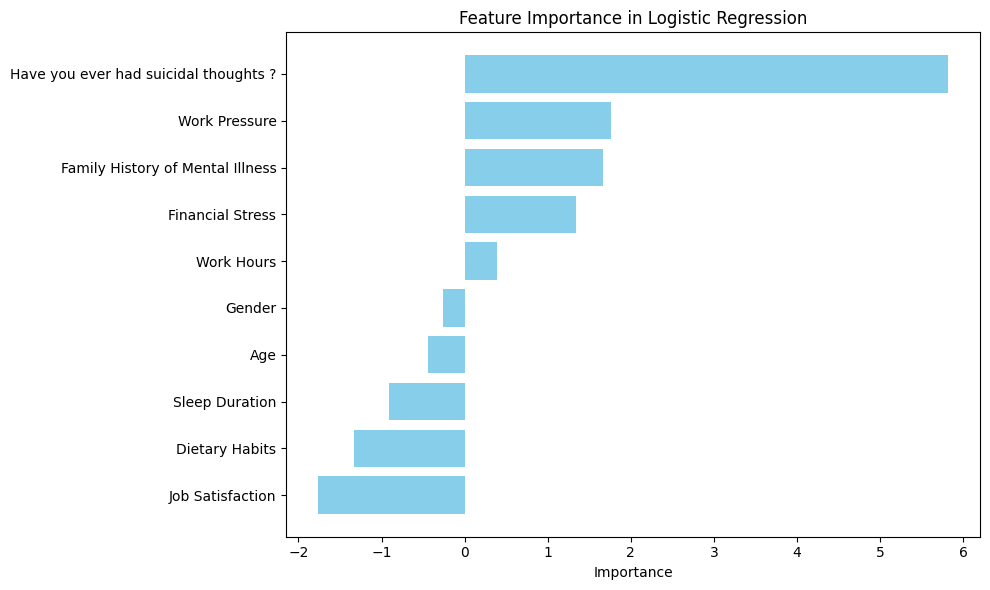

In [25]:
# Extract feature importance
importance = model.coef_[0]
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


We want to fix the problem we mention before (dataset too small, too few people with depression). Since it is hard to increase the dataset as we can't make up data, but we could balance the number of people with depression and without depression by using **SMOTE** library. 

Let's try that and compare the result get from the result. 

In [26]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the data (fit on training and transform both training and testing)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model_smote = LogisticRegression(random_state=2)
model_smote.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test set
y_pred = model_smote.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

print("\nResampled training dataset distribution:")
print(pd.Series(y_train_resampled).value_counts())

Accuracy: 0.9691558441558441

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       561
           1       0.76      0.95      0.85        55

    accuracy                           0.97       616
   macro avg       0.88      0.96      0.91       616
weighted avg       0.97      0.97      0.97       616


Confusion Matrix:
 [[545  16]
 [  3  52]]

Resampled training dataset distribution:
Depression
0    1289
1    1289
Name: count, dtype: int64


C:\Users\ruiwu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

C:\Users\ruiwu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



####  Detail comparsion between original training dataset and training dataset with SMOTE
1. Accuracy
SMOTE Dataset: 96.92%
Original Dataset: 98.70%
Observation: The original dataset has a slightly higher accuracy, which is expected given the class imbalance favoring the majority class (depression). 

2. Precision
Non depression: 
SMOTE: 99%, Original: 99%
Observation: Precision for the majority class remains consistent in both models.

Depression:
SMOTE: 76%, Original: 100%
Observation: The precision for the non depression class is significantly lower with SMOTE, indicating more false positives (misclassifying non-depressed as depressed).
This make sense as SMOTE library give data for people with depression. 

3. Recall
Non depression:
SMOTE: 97%, Original: 100%
Observation: SMOTE sacrifices some recall for the majority class to improve detection of the depression class.

Depression:
SMOTE: 95%, Original: 85%
Observation: Recall for the depression class improves with SMOTE, indicating the model identifies more cases of depression.

4. F1-Score
Non depression:
SMOTE: 98%, Original: 99%
Observation: Slight drop in F1-score for this class with SMOTE.

Depression:
SMOTE: 85%, Original: 92%
Observation: SMOTE improves recall but sacrifices precision, resulting in a lower F1-score for the depression class compared to the original dataset.

5. Macro Avg vs. Weighted Avg
Macro Avg:
SMOTE: 0.88 precision, 0.96 recall, 0.91 F1-score
Original: 0.99 precision, 0.93 recall, 0.96 F1-score
Observation: SMOTE achieves better balance between recall and precision across classes, especially in recall for the depression class.

Weighted Avg:
SMOTE: 0.97 across all metrics
Original: 0.99 across all metrics
Observation: The original dataset performs better on weighted averages due to the majority class dominating.

6. Confusion Matrix
SMOTE Dataset:
Depression: 3 false negatives, 16 false positives
Observation: SMOTE reduces false negatives (higher recall) at the cost of more false positives (lower precision).

Original Dataset:
Depression (minority): 8 false negatives, 0 false positives
Observation: The model struggles with recall for the minority class (more false negatives), though it has perfect precision (no false positives).

7. Conclusions:
Performance on the depression Class:
SMOTE significantly improves recall for the deoreesion class (from 85% to 95%), which is important for detecting depression cases.
However, it reduces precision for the depression class, resulting in more false positives.

8. Class Imbalance:
The original dataset favors the majority class, which inflates accuracy and precision but underrepresents the minority class's performance.

9. **Model Choice**:
As our goal is to predict people with depression, it would be better to use the training dataset processed with SMOTE. Hence, we will use the traning data set with SMOTE. 

(If we want to reduce false positive rate in people with depression, we should go with the original data|set)


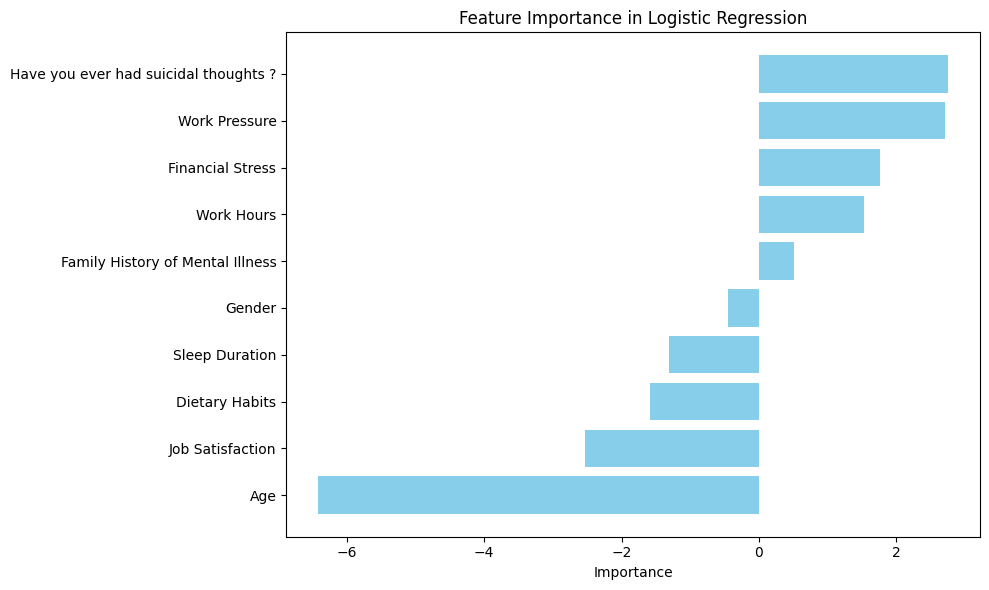

In [27]:
# Extract feature importance
importance = model_smote.coef_[0]
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


1. Suicidal Thoughts, Work Pressure, Financial Stress, Work Hours, Family History of Mental Illness - Positive Influence

This is intuitive since these factors are typically associated with increased stress, anxiety, and mental health struggles, potentially leading to depression.

Suicidal thoughts: Naturally, individuals who have experienced suicidal thoughts are more likely to have depression.

Work pressure: As expected, higher stress at work can lead to burnout, anxiety, and depression.

Financial stress: Financial problems are one of the top stressors in people's lives, often leading to a decline in mental health.

Work hours: Longer work hours can lead to stress and burnout, factors that contribute to depression.

Family history of mental illness: Although slightly less important in your analysis, a family history of mental illness is known to be a significant risk factor for mental health issues.

2. Age, Job Satisfaction, Dietary Habits, Sleep Duration, and Gender - Negative Influence

Age: This is particularly interesting, as younger people tend to have higher rates of depression. It aligns with our observation from result from data preprocessing that younger people may face unique pressures related to school, work, and societal expectations.

Job satisfaction: People who are dissatisfied with their jobs may experience depression due to feelings of frustration, hopelessness, or lack of fulfillment.

Dietary habits and sleep duration: Both are important factors for overall mental well-being. Poor sleep and poor diet can significantly impact mood and mental health, leading to depression.

Gender: Gender has a negative influence on depression (0 = male, 1 = female). Even though women in the dataset show a higher likelihood of depression, the model doesn't consider gender as a strong factor. This discrepancy might stem from how the data is structured or it is due to the reason I mentioned from the chi-square test before.  

3. Insights on Gender and Family History of Mental Illness
Gender as a non-important factor: Even though females are more likely to report depression in the dataset, the model doesn't rank gender as a particularly influential factor. This could be due to confounding factors in the data, where other features (e.g., work pressure, suicidal thoughts) overshadow the influence of gender on depression.

Family history of mental illness: The mild correlation here suggests that it’s less important than other factors, which could be context-dependent. The fact that it's only slightly correlated in the analysis matches the relatively weak relationship seen in the heatmap. But this result is surprising to me as people always connected depression with family history. 

4. Overall Conclusion
The above model identifies age, job satisfaction, suicidal thoughts, and work pressure as the most important factors contributing to depression. It's interesting that work-related factors like work pressure and work hours are considered as influential, reflecting the significant impact work can have on mental health.
The fact that work-related stress plays such a strong role highlights a key area for intervention, especially in high-stress jobs or workplaces with poor support systems.
The analysis also aligns with real-world concerns, where work-life balance, mental health support, and coping mechanisms are crucial in preventing depression.

## Validation: KNN Model (takes a parameter)
Even though Logistic Regression model give us a good result, we should still validate the result using another model. In this case, we choose KNN model with input training dataset with preprocessing with SMOTE. |

We start from randomly use a k number (k = number of neighbor = 1) and get the result. 

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=21)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=1) 

# Fit the model
knn.fit(X_train_scaled, y_train_resampled)

# Predict on the scaled test data
y_pred = knn.predict(X_test_scaled)  

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# check if there is enough datapoint that contain people with depression. 
# print(sum(y_train_resampled == 1))


Accuracy: 0.9107142857142857

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       561
           1       0.50      0.69      0.58        55

    accuracy                           0.91       616
   macro avg       0.73      0.81      0.77       616
weighted avg       0.93      0.91      0.92       616


Confusion Matrix:
 [[523  38]
 [ 17  38]]


C:\Users\ruiwu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

C:\Users\ruiwu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



The accuracy is lower than the Logistic Regression model and KNN model performs worse. This may due to the bad choice of the number of k (number of neighbor)

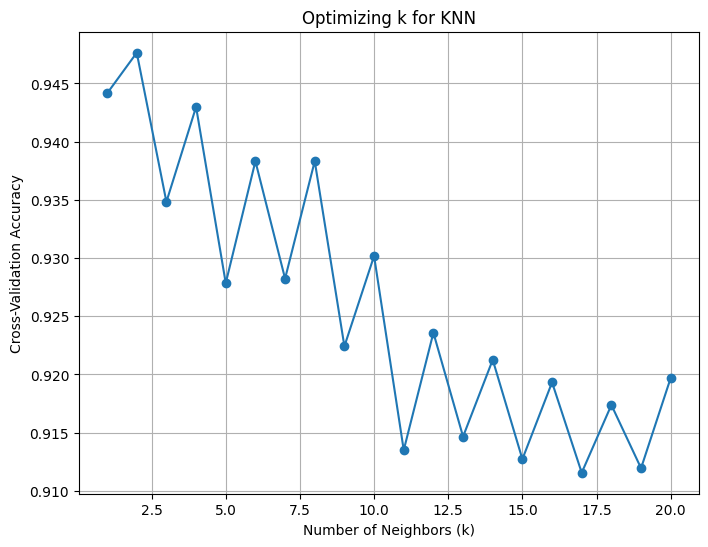

Best k: 2


In [29]:
from sklearn.model_selection import cross_val_score

# Try different values of k
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train_resampled, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Optimizing k for KNN')
plt.grid()
plt.show()

# Best k
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k: {best_k}")


By above analysis, we get to see k = 2 will give us the best performance. 

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Fit KNN with the optimal k
knn_optimized = KNeighborsClassifier(n_neighbors=best_k)
knn_optimized.fit(X_train_scaled, y_train_resampled)

# Predict and evaluate
y_pred_optimized = knn_optimized.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred_optimized)

print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("\nClassification Report:\n", classification_report(y_test, y_pred_optimized))
print("\nConfusion Matrix:\n", conf_matrix)

Optimized Accuracy: 0.9237012987012987

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       561
           1       0.56      0.64      0.60        55

    accuracy                           0.92       616
   macro avg       0.76      0.79      0.78       616
weighted avg       0.93      0.92      0.93       616


Confusion Matrix:
 [[534  27]
 [ 20  35]]


We can see that even with the most optimal choice of k, the accuracy of KNN model is still lower than the logisitical regression model. For both predicting peole with / without depression, it perform worse compare to the previous model. This could be due to the class imbalance or the way KNN handles data with such distribution, but I am not sure for the exact reason.

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Ensure X_train_scaled_df is based on resampled data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

feature_importances = {}
for feature in X.columns:
    X_train_subset = X_train_scaled_df.drop(columns=[feature])
    X_test_subset = X_test_scaled_df.drop(columns=[feature])
    
    knn = KNeighborsClassifier(n_neighbors=best_k)
    
    scores = cross_val_score(knn, X_train_subset, y_train_resampled, cv=10, scoring='accuracy')
    
    feature_importances[feature] = scores.mean()

sorted_importance = sorted(feature_importances.items(), key=lambda item: item[1], reverse=True)

print("\nFeature Importances (sorted):\n", sorted_importance)



Feature Importances (sorted):
 [('Family History of Mental Illness', np.float64(0.9596657919343649)), ('Gender', np.float64(0.9550010557113987)), ('Financial Stress', np.float64(0.9511356438331372)), ('Sleep Duration', np.float64(0.94958827255452)), ('Dietary Habits', np.float64(0.9472581666817483)), ('Work Pressure', np.float64(0.9398862848007722)), ('Work Hours', np.float64(0.9371776309836214)), ('Have you ever had suicidal thoughts ?', np.float64(0.9336832262540344)), ('Job Satisfaction', np.float64(0.9329095406147256)), ('Age', np.float64(0.8685186860917564))]


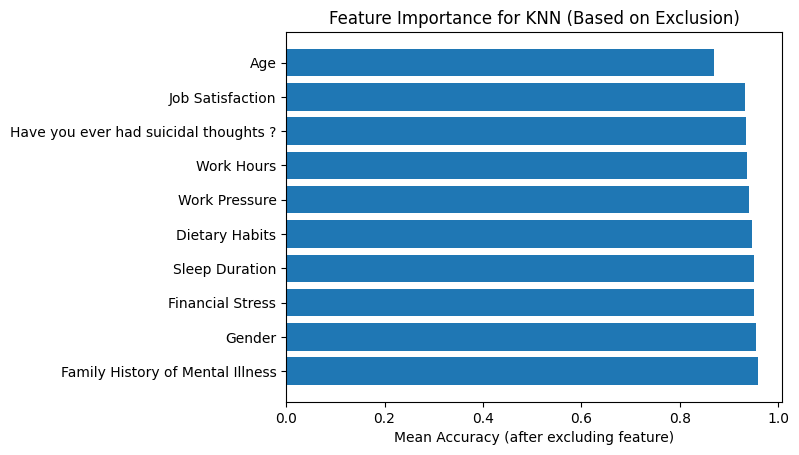

In [32]:
plt.barh([item[0] for item in sorted_importance], [item[1] for item in sorted_importance])
plt.xlabel('Mean Accuracy (after excluding feature)')
plt.title('Feature Importance for KNN (Based on Exclusion)')
plt.show()

#### Feature Importance in KNN and Logistic Regression:
As x - axis represent the mean accuracy (after exluding feature), the value on the y axis with the smaller value indicate it is a more important factor. 

KNN model get the same result as logistic regression model where they both believe age, suicidal thoughts, work pressure and job satisfaction are important factors. 

The fact that both models align on the importance of age, suicidal thoughts, work pressure, and job satisfaction is a positive sign, as it suggests that these features are indeed meaningful predictors for depression in the dataset.

Even though Logistic Regression think the importance between suicidal thoughts and work pressure are similar, KNN model thinks suicidal though is more importance compare to work pressure. 

The difference in how KNN and logistic regression interpret suicidal thoughts and work pressure could come down to how each model evaluates feature importance. KNN might be more sensitive to specific combinations of features that affect the distances between samples, while logistic regression is looking at linear relationships and could group suicidal thoughts and work pressure differently.

## Surprise Results:
A. Gender not important despite higher depression rates in females: This is an surprising result. While many research suggest that gender is a significant factor in depression, this dataset might not reflect this due to several reasons:

1. Data quality: Gender information might be poorly recorded, or there could be biases in how it is reported.
2. Dataset size: This dataset is small and it might not have enough data to capture subtle trends or differences between genders.
3. Cultural factors: Some individuals might feel reluctant to report depression, which could introduce bias in the data. 

B. Family history of mental illness not important (even though many research will connect this with depression and other mental illness): This might be due to:
1. Small or unbalanced dataset: If family history of mental illness is not well-represented or not recorded in the dataset, the model might not be able to learn a meaningful relationship.
2. Other influencing factors: There might be other features (like suicidal thoughts or work pressure) that have a stronger influence on depression in this specific dataset.

C. Work pressure more important than work hours: This could indicate that work pressure, rather than the quantity of work, has a stronger relationship with depression in this dataset. It's possible that work pressure captures more of the psychological burden, which might be a stronger predictor of depression than simply the number of hours worked.

D. Sleep duration not a significant factor: This could be surprising, as research often shows a strong link between poor sleep and mental health issues. However, this model may not capture this because:
1. Sleep duration might not be a significant differentiator in this particular dataset or population (as there are only 4 options for sleep duratioin rather the detail hours they spent).
2. Other features might be more predictive of depression in the dataset, overshadowing the importance of sleep duration.

# WEB BACKEND AND FRONTEND 

Webstie overview can be view here: https://www.youtube.com/watch?v=rlFoh5S2qj4

## Server API 
My server API provides a platform for analyzing and visualizing healthcare data related to mental health, with a focus on depression. It allows users to interact with a dataset, perform data analysis, and visualize results through various endpoints. The API offers functionality for selecting, adding, and removing columns for analysis, conducting principal component analysis (PCA) for dimensionality reduction, and retrieving individual records based on specific criteria. Also, it allow user input their information, and check the model prediction result. 2 model: KNN and logisitcal regression model are provided in my website.

1. / (Index) - GET and POST

Purpose: The index route serves as the main interface for users to interact with the dataset and perform basic data manipulations.

GET Request: Displays the current state of selected columns, visualizes boxplots, and detects outliers based on the selected data features.

POST Request:
Add Columns: Users can select columns to add to the analysis. The selected columns are stored in the session and will be used for visualizations and further analysis.
Delete All: Resets the selected columns by clearing the session data.

2. /analyze - GET

Purpose: This route renders the analyze.html template, where users can perform deeper analysis on the dataset.

3. /pca_data - GET
Purpose: This endpoint performs Principal Component Analysis (PCA) on the dataset to reduce dimensionality to two components. It returns a JSON response containing the PCA results, including:
- The first and second principal components.
- Metadata such as Age, Gender, and Depression status for each record.
- The result is color-coded by Depression status.

4. /api/person/<int:person_index> - GET
Purpose: This endpoint returns detailed information about an individual person in the dataset based on their index. The information includes:
- Mapped values for attributes such as Gender, Sleep Duration, and Dietary Habits.
- Information on mental health indicators such as suicidal thoughts, depression status, and family history of mental illness.
- Error Handling: If the provided index is invalid, the API returns an error message.

5. /barplot - GET
Purpose: This endpoint generates a bar plot visualizing the distribution of depression status in the dataset.

Output: The bar plot displays the count of "Yes" and "No" values for the depression status, allowing users to visualize the distribution of depression across the dataset.

6. /KNN_model - GET and POST
Purpose: This endpoint provides a KNN model for predicting depression based on user input and visualizes the accuracy of the model's performance.

GET Request:
Displays the KNN_model.html template with the option to input features for depression prediction (as well as the number of neighbor they wished to use in the analysis).

It also shows an image (healthcare.png) by default, which changes depending on the model's prediction (i.e., a happy or emo image based on whether the person is predicted to be depressed).

POST Request:
Accepts user input from a form where users can enter various features such as Gender, Age, Work Pressure, Job Satisfaction, Sleep Duration, Dietary Habits, and others.
The form data is processed, including encoding categorical variables into numeric values (e.g., "Male" = 0, "Female" = 1, etc.).

The data is scaled using a standard scaler that was applied to the training data.
A K-Nearest Neighbors (KNN) classifier is trained using the preprocessed dataset. The SMOTE (Synthetic Minority Over-sampling Technique) is used to handle imbalanced classes in the training data.

After training with the number of neighbor selected by the user, the model’s accuracy is calculated on both the training and testing sets, and the results are visualized in the form of percentages (Training Accuracy and Testing Accuracy).

Based on the input features, the model predicts whether the person is depressed or not, and the prediction is displayed along with an appropriate image representing the result (e.g., a sad image if depressed or a happy image if not).

7. /LR_model - GET and POST
Purpose: Similar to the KNN model before, this endpoint provides a logistical regression model for predicting depression based on user input and visualizes the accuracy of the model's performance.

GET Request:
Displays the LR_model.html template with the option to input features for depression prediction (as well as the size of the traning dataset).

It also shows an image (healthcare.png) by default, which changes depending on the model's prediction (i.e., a happy or emo image based on whether the person is predicted to be depressed).

POST Request:
Accepts user input from a form where users can enter various features such as Gender, Age, Work Pressure, Job Satisfaction, Sleep Duration, Dietary Habits, and others.
The form data is processed, including encoding categorical variables into numeric values (e.g., "Male" = 0, "Female" = 1, etc.).

The data is scaled using a standard scaler that was applied to the training data.
A logisitical regession is trained using the preprocessed dataset. The SMOTE (Synthetic Minority Over-sampling Technique) is used to handle imbalanced classes in the training data.

After training with the size of the traning dataset selected by the user, the model’s accuracy is calculated on both the training and testing sets, and the results are visualized in the form of percentages (Training Accuracy and Testing Accuracy).

Based on the input features, the model predicts whether the person is depressed or not, and the prediction is displayed along with an appropriate image representing the result (e.g., a sad image if depressed or a happy image if not).


## Web frontend
I created 5 different HTML, each one associated with a different types of data visulization or data analysis. 

1. index.html: Box plot of each factors
It will have a list of factors that user can choose from. By selecting the features, user is able to see the overall spread of the choose featurees from the dataset and observe if there is any outlier. 

This is the image of my main page 
![Main page](web_image/index_no_edit.jpg)

After adding some of the columns, here are the boxplot result: 
![Main page](web_image/index_edit.jpg)

2. barplot.html
This will give user an overall idea of the dataset, it show the number of people with / without depression. When user hover over the barplot, it will display the number of people with depression / without depression.

Display of my barplot
![barplot](web_image/barplot.jpg)

Barplot showing the hover over feature (display number of people in the hover over plot), I will included this in my video. 
![barplot](web_image/barplot2.png)

3. analyze.html
This web page will display all the patient information (2054 entries) in terms of dataset, by applying plotly package, user is able to select the datapoint and get the detail information of the selected datapoint. 

![pca](web_image/pca.jpg)

Display result after zoom in and selecting a red datapoint (with depression)
![pca](web_image/pca_selected.png)

4. KNN_model.html
This webpage allow user to iinput their own information and get a prediction result to see whether they got depression, also, the prediction accuracy will be display as well. 

![knn](web_image/knn1.jpg)

Display result after input information (if the prediction result is good): 
![knn](web_image/knn_happy.png)

If the prediction result is not good(depression)
![knn](web_image/knn_sad.jpg)

Also, noticed the model accuracy is different as I use different k (number of neighbor) in above image. 

5. LR_model.html
Similar to the KNN model, this one will ask the user for the same question except for the last one (instead of number of neighbor, ask for the training dataset user want to use)

![knn](web_image/lr.png)

If the prediction result is good (not depress)
![knn](web_image/lr_happy.png)

If the result is depression
![knn](web_image/lr_bad.png)

Noted that my accuracy for 2 different image are different as for the first one, I choose to use 50% of the data as the traning data, and the second one I choose to use 10% of the data as the training data. 

Overall, my website front-end is well connected with my server API, display the data and data analysis result with a good style.css file. I have 5 html file, each display different things. index will display the boxplot for user to see the spread of the data and user get to choose the features they would like to see. barplot html will display the barplot to show user the percentage of people with depression in this dataset. analyze html will show the datapoint in a 2D format and allow user to click on the points they are interested in. KNN model and LR model are very similar, both shown the prediciton result based on the user input. But they will ask for different parameter (one for number of neighbor, one for the size of the training data). And they will display the prediciton result based on different model as well as the accuracy of their prediciton. 


## Web interface
My website has a web interface, user is able to check the information they needed for this dataset and interacted with the model training by selecting different parameters. Different output / result will be display based on the user input. Information are processed in the backend and delivery to the frontend. 

## Allow user to selected analysis option
- User is able to choose from barplot, boxplot, PCA analysis, KNN model or logisitical regression model. 
- User is also able to choose the features they would like to see in the barplot, boxplot. 
- User is able to choose the datapoint they would like to see from the PCA result.

## Allow user specify parameters
- For both KNN model and logistical regressioni model, user is able to choose the features including their gender, age, work hours... (all 10 columns [excluded depression] from the dataset).
- For KNN model, user is able to choose the number of neighbor they would like to use when training the KNN model. 
- For logistical regression model, user is able to choose the size of the training data

## Respond to different parameters
- For both KNN model and LR model, they will display different text, emoji and pictures based on the result of the prediction (happy image for non depression and a sad image for depression)
- Depend on the parameters user choose, model will output different prediction
- Based on the differences in the size of the training dataset / number of neighbor used to train the model, the model accuracy will be different and those difference will be shown as a plot in the bottom of the webpage. 

## Visualize the results
- Based on result of prediction: happy / not happy image will be display for both model
- Based on different paramtetes for model training, the accuracy of the model will be different and shown in the barplot for both model. 

## Use an API to request specific analyses and retrieve the results
- Use API from analyze.html to request the result 
- /pca_data: The loadPCAPlot function uses a GET request via $.get() to the /pca_data API endpoint. This retrieves PCA plot data (e.g., x, y, text, color) from the backend. The data is then used to render a PCA scatter plot using Plotly.
- /api/person/<pointIndex>: When the user clicks on a point in the PCA scatter plot, the plotly_click event handler makes a GET request to /api/person/<pointIndex> using fetch().The API returns detailed information about the selected individual (e.g.,gender, age, workPressure, etc.) in JSON format. The frontend dynamically updates the #details section to display the retrieved data
